# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-10-17 17:00:03.225855


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/16/20


,10/16/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,8048865,218575,2.72
Brazil,5200300,153214,2.95
India,7432680,112998,1.52
Mexico,841661,85704,10.18
United Kingdom,692112,43519,6.29
Italy,391611,36427,9.30
Spain,936560,33775,3.61


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 10/16/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
46803,US,7916099,2020-10-14,216872.0,985.0,59494.0,52345.285714
46802,US,7856605,2020-10-13,215887.0,802.0,52406.0,51037.714286
46801,US,7804199,2020-10-12,215085.0,317.0,41653.0,49542.428571
46800,US,7762546,2020-10-11,214768.0,398.0,44614.0,49243.000000
46799,US,7717932,2020-10-10,214370.0,618.0,54639.0,47941.571429
46798,US,7663293,2020-10-09,213752.0,990.0,57420.0,47285.142857
46797,US,7605873,2020-10-08,212762.0,961.0,56191.0,46868.857143


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/16/20


,10/16/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,481107,33337.0,6.93
Texas,843487,17375.0,2.06
California,871253,16910.0,1.94
New Jersey,217804,16202.0,7.44
Florida,748437,15830.0,2.12
Massachusetts,142346,9702.0,6.82
Illinois,339757,9425.0,2.77


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 10/16/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1611,California,865204,2020-10-14,16729.0,85.0,3894.0,3325.142857
1610,California,861310,2020-10-13,16644.0,58.0,3397.0,3301.142857
1609,California,857913,2020-10-12,16586.0,7.0,2723.0,3200.857143
1608,California,855190,2020-10-11,16579.0,12.0,2780.0,3211.000000
1607,California,852410,2020-10-10,16567.0,81.0,3334.0,3269.857143
1606,California,849076,2020-10-09,16486.0,68.0,3806.0,3294.714286
1605,California,845270,2020-10-08,16418.0,80.0,3342.0,3295.000000


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 10/16/20


,10/16/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,287222,6855.0,2.39
Orange,56587,1401.0,2.48
Riverside,63284,1269.0,2.01
San Bernardino,59463,989.0,1.66
San Diego,51781,865.0,1.67
San Joaquin,21138,483.0,2.28
Sacramento,24102,464.0,1.93


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 10/16/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
5108,Los Angeles,285016,2020-10-14,6812.0,22.0,1266.0,1081.571429
5107,Los Angeles,283750,2020-10-13,6790.0,17.0,768.0,1127.714286
5106,Los Angeles,282982,2020-10-12,6773.0,2.0,847.0,1148.571429
5105,Los Angeles,282135,2020-10-11,6771.0,3.0,970.0,1081.428571
5104,Los Angeles,281165,2020-10-10,6768.0,27.0,1256.0,1075.285714
5103,Los Angeles,279909,2020-10-09,6741.0,15.0,1244.0,1036.571429
5102,Los Angeles,278665,2020-10-08,6726.0,17.0,1220.0,1042.000000
5101,Los Angeles,277445,2020-10-07,6709.0,28.0,1589.0,1020.857143
5100,Los Angeles,275856,2020-10-06,6681.0,27.0,914.0,938.857143
5099,Los Angeles,274942,2020-10-05,6654.0,7.0,377.0,926.714286



7 day new US cases as of 10/16/20


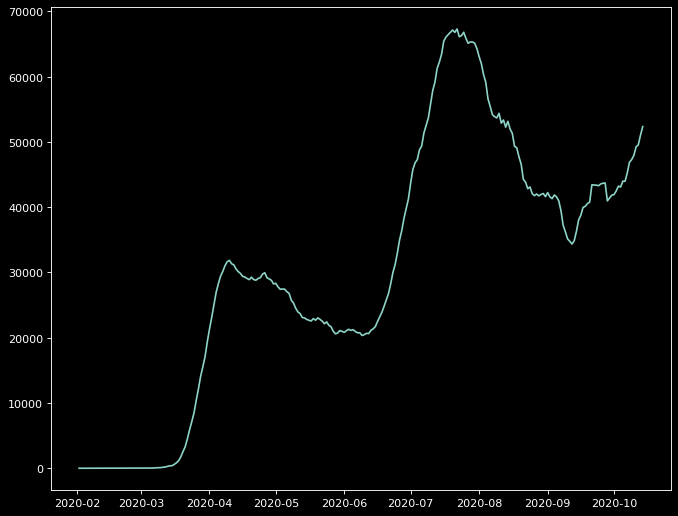

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 10/16/20


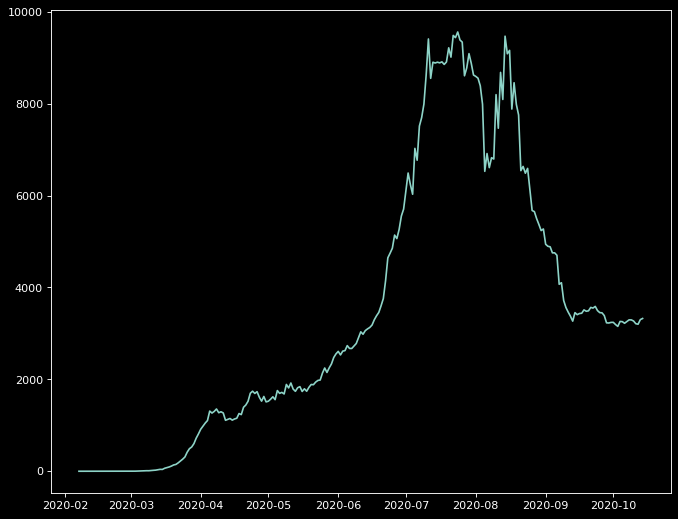

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 10/16/20


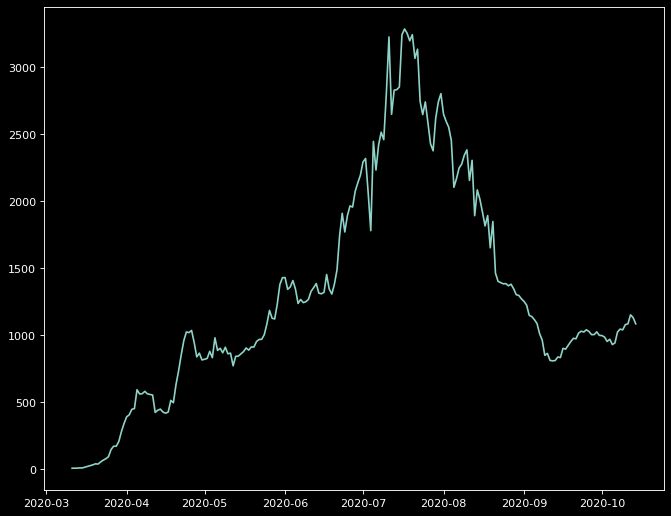

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()